In [1]:
!python -m pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [4]:
def preprocess_data(df):
    df.reset_index(inplace=True)
    df = df[['Date', 'Close']]
    df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
    return df

In [5]:
def forecast_stock_prices(data):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=365)  # Forecasting for one year
    forecast = model.predict(future)
    return forecast

In [6]:
# Function to evaluate forecast performance
def evaluate_forecast(true, predicted):
    common_dates = true.index.intersection(predicted.index)
    true_common = true.loc[common_dates]
    predicted_common = predicted.loc[common_dates]
    mse = mean_squared_error(true_common, predicted_common)
    mae = mean_absolute_percentage_error(true_common, predicted_common)
    return mse, mae


In [7]:
def plot_forecast(data, forecast, company_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data['ds'], data['y'], label='Actual', color='blue')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.5)
    ax.set_title(f'{company_name} Stock Price Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    ax.legend()
    plt.show()


In [8]:
google_data = fetch_stock_data('GOOGL', '2010-01-01', '2024-05-11')
microsoft_data = fetch_stock_data('MSFT', '2010-01-01', '2024-05-11')
apple_data = fetch_stock_data('AAPL', '2010-01-01', '2024-05-11')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
print("Google Data Columns:", google_data.columns)
print("Microsoft Data Columns:", microsoft_data.columns)
print("Apple Data Columns:", apple_data.columns)

Google Data Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Microsoft Data Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Apple Data Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
google_data = preprocess_data(google_data)
microsoft_data = preprocess_data(microsoft_data)
apple_data = preprocess_data(apple_data)

In [11]:
google_forecast = forecast_stock_prices(google_data)
microsoft_forecast = forecast_stock_prices(microsoft_data)
apple_forecast = forecast_stock_prices(apple_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyed18tn2/nc4s5w3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyed18tn2/59g01031.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40334', 'data', 'file=/tmp/tmpyed18tn2/nc4s5w3x.json', 'init=/tmp/tmpyed18tn2/59g01031.json', 'output', 'file=/tmp/tmpyed18tn2/prophet_model215u8s8a/prophet_model-20240511185600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:56:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:56:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpye

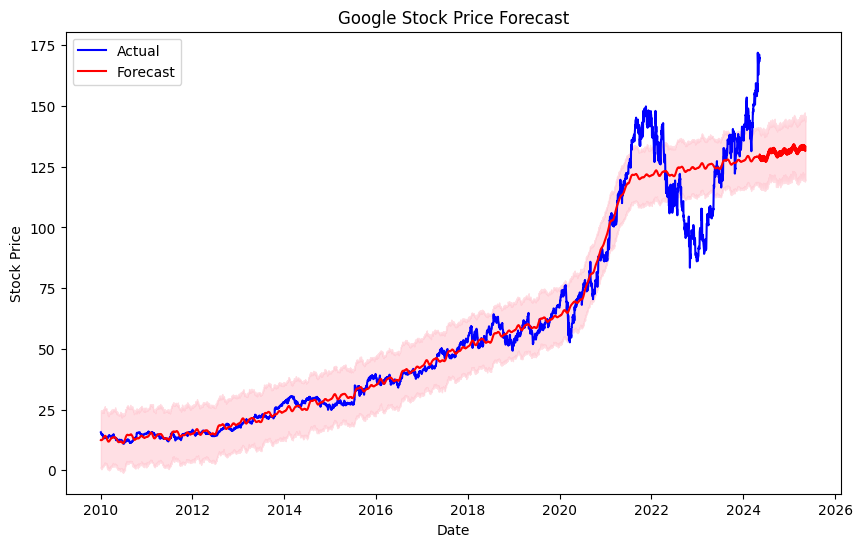

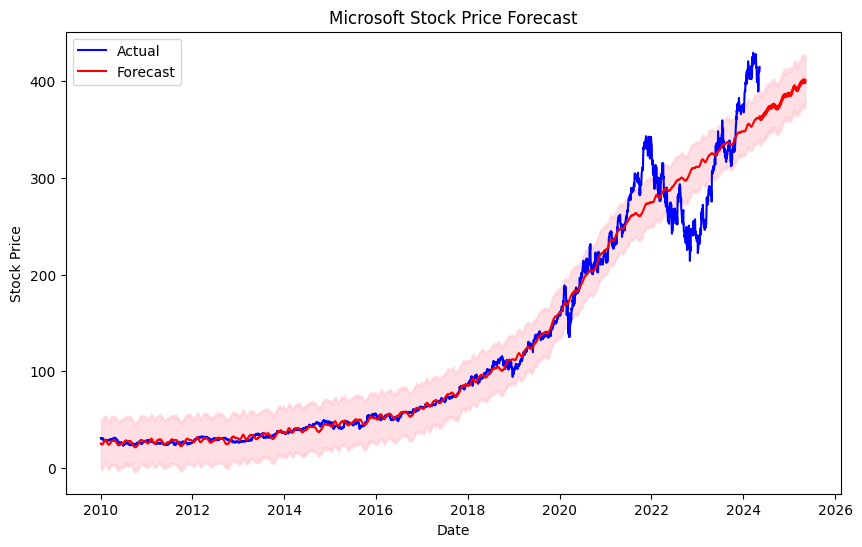

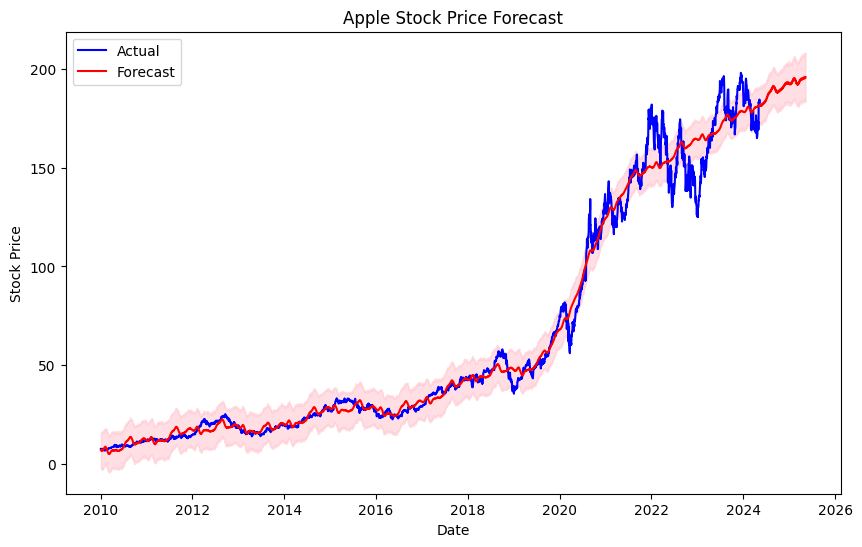

In [12]:
plot_forecast(google_data, google_forecast, 'Google')
plot_forecast(microsoft_data, microsoft_forecast, 'Microsoft')
plot_forecast(apple_data, apple_forecast, 'Apple')

In [13]:
!pip install mplcursors

In [22]:



def compare_stock_prices(data_list, company_names):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, data in enumerate(data_list):
        ax.plot(data['ds'], data['y'], label=company_names[i])

    ax.set_title('Stock Prices Comparison')
    ax.set_xlabel('Year')
    ax.set_ylabel('Stock Price')
    ax.legend()
    plt.grid

    plt.show()


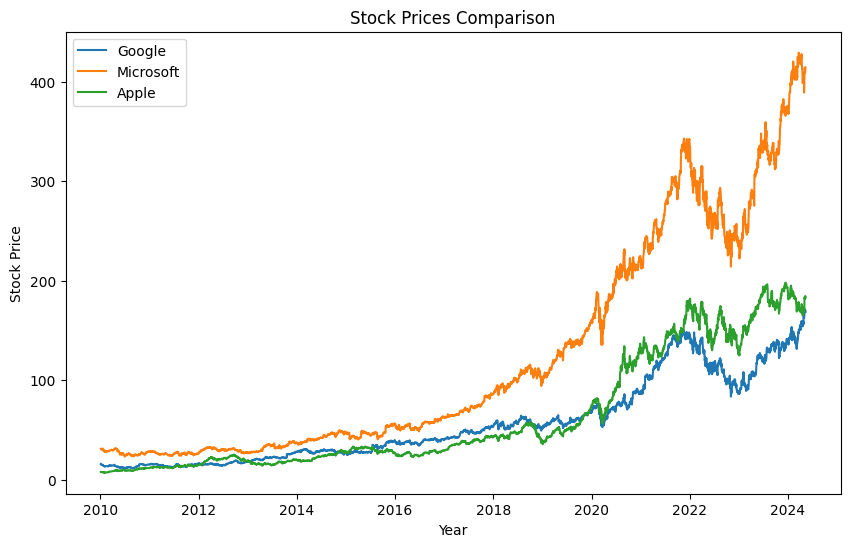

In [23]:
data_list = [google_data, microsoft_data, apple_data]
company_names = ['Google', 'Microsoft', 'Apple']

compare_stock_prices(data_list, company_names)

In [16]:
google_mse, google_mae = evaluate_forecast(google_data['y'], google_forecast['yhat'])
microsoft_mse, microsoft_mae = evaluate_forecast(microsoft_data['y'], microsoft_forecast['yhat'])
apple_mse, apple_mae = evaluate_forecast(apple_data['y'], apple_forecast['yhat'])

In [17]:
print("Performance Metrics:")
print("Google - MSE:", google_mse, "MAE:", google_mae)
print("Microsoft - MSE:", microsoft_mse, "MAE:", microsoft_mae)
print("Apple - MSE:", apple_mse, "MAE:", apple_mae)

Performance Metrics:
Google - MSE: 78.42508582111549 MAE: 0.07892134266022935
Microsoft - MSE: 372.4564669271619 MAE: 0.07148591148003496
Apple - MSE: 50.8085510335289 MAE: 0.08728412088229834


In [24]:
def get_estimated_price(month, year, data_list, forecast_list, company_names):
    target_date = pd.to_datetime(f'{year}-{month}-01')
    estimated_prices = {}
    for i, forecast in enumerate(forecast_list):
        predicted_price = forecast.loc[forecast['ds'] == target_date]['yhat'].values[0]
        estimated_prices[company_names[i]] = predicted_price
    return estimated_prices

In [25]:
data_list = [google_data, microsoft_data, apple_data]
forecast_list = [google_forecast, microsoft_forecast, apple_forecast]
company_names = ['Google', 'Microsoft', 'Apple']

month = input("Enter the month (1-12): ")
year = input("Enter the year (up to 2026): ")

estimated_prices = get_estimated_price(month, year, data_list, forecast_list, company_names)
print(f"Estimated stock prices for {month}/{year}:")
for company, price in estimated_prices.items():
    print(f"{company}: ${price:.2f}")

Enter the month (1-12): 5
Enter the year (up to 2026): 2025
Estimated stock prices for 5/2025:
Google: $132.05
Microsoft: $398.70
Apple: $195.34
